In [8]:
import pandas as pd

test_df = pd.read_csv('../data/train_values.csv')
test_df.head()
test_df.shape


(260601, 39)

In [7]:
y = pd.read_csv('../data/train_labels.csv')
y.head()
y.shape

(260601, 2)

In [10]:
features = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']

In [37]:
# joining the two dataframes
subset = test_df[features].join(y, how='left')
subset.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,building_id,damage_grade
0,2,30,6,5,802906,3
1,2,10,8,7,28830,2
2,2,10,5,5,94947,3
3,2,10,6,5,590882,2
4,3,30,8,9,201944,3


In [38]:
subset.describe()

,count_floors_pre_eq,age,area_percentage,height_percentage,building_id,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,2.606010e+05,260601.000000
mean,2.129723,26.535029,8.018051,5.434365,5.256755e+05,2.238272
std,0.727665,73.565937,4.392231,1.918418,3.045450e+05,0.611814
min,1.000000,0.000000,1.000000,2.000000,4.000000e+00,1.000000
25%,2.000000,10.000000,5.000000,4.000000,2.611900e+05,2.000000
50%,2.000000,15.000000,7.000000,5.000000,5.257570e+05,2.000000
75%,2.000000,30.000000,9.000000,6.000000,7.897620e+05,3.000000
max,9.000000,995.000000,100.000000,32.000000,1.052934e+06,3.000000


In [39]:
subset.count_floors_pre_eq.value_counts(ascending=False, dropna=False)

count_floors_pre_eq
2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count, dtype: int64

In [40]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(test_df[features], y.damage_grade)

# Creating a Series for better visualization
mi_series = pd.Series(mutual_info, index=test_df[features].columns)
mi_series.sort_values(ascending=False, inplace=True)

print(mi_series)

count_floors_pre_eq    0.020503
height_percentage      0.014671
area_percentage        0.011546
age                    0.003936
dtype: float64


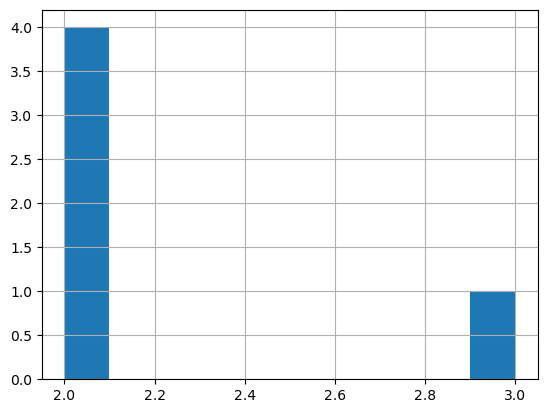

In [32]:
import matplotlib.pyplot as plt

subset['count_floors_pre_eq'].hist()

# Display the plot
plt.show()


In [42]:
subset.count_floors_pre_eq.value_counts(dropna=False)

count_floors_pre_eq
2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count, dtype: int64

In [43]:
subset.height_percentage.value_counts(dropna=False)

height_percentage
5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: count, dtype: int64

In [36]:
subset.area_percentage.describe()

count    5.000000
mean     6.600000
std      1.341641
min      5.000000
25%      6.000000
50%      6.000000
75%      8.000000
max      8.000000
Name: area_percentage, dtype: float64

In [35]:
subset.area_percentage.value_counts(dropna=False)

area_percentage
6    2
8    2
5    1
Name: count, dtype: int64